In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

## Leitura e Processamento de Dados

In [3]:
DATA_DIR = 'assets/household_demand/'
DEVICE_INFO_DIR = 'assets/devices_info.csv'

In [4]:
import os
devices = os.listdir(DATA_DIR)
devices

['dehumidifier_322.csv',
 'boiler_217.csv',
 'internet_router_131.csv',
 'fridge_207.csv',
 'laptop_289.csv',
 'sound_system_252.csv',
 'laptop_64.csv',
 'air_conditioner_222.csv',
 'radiator_309.csv',
 'internet_router_295.csv',
 'coffee_54.csv',
 'coffee_97.csv',
 'dryer_219.csv',
 'screen_302.csv',
 'fridge_98.csv',
 'computer_44.csv',
 'printer_286.csv',
 'coffee_37.csv',
 'fan_215.csv',
 'air_purifier_293.csv',
 'fridge_317.csv',
 'micro_wave_oven_147.csv',
 'phone_charger_282.csv',
 'freezer_249.csv',
 'fridge_284.csv',
 'washing_machine_218.csv',
 'washing_machine_157.csv',
 'tv_290.csv',
 'vacuum_254.csv',
 'washing_machine_32.csv',
 'washing_machine_343.csv',
 'micro_wave_oven_314.csv',
 'dishwasher_53.csv',
 '3D_printer_29.csv',
 'vacuum_236.csv',
 'washing_machine_52.csv',
 'dehumidifier_310.csv',
 'washing_machine_135.csv',
 'solar_panel_325.csv',
 'screen_146.csv',
 'boiler_226.csv',
 'boiler_233.csv']

In [5]:
# guardar a série de cada equipamento num dicionário
import re

devices_data = pd.read_csv(DEVICE_INFO_DIR)

series_d = {}
for device in devices:
    print(device)
    
    df = pd.read_csv(f'{DATA_DIR}{device}', parse_dates=['timestamp'])

    df.set_index('timestamp', inplace=True)
    
    device_name = re.sub('.csv', '', device)
    
    df_power = df['power']
    
    # agregar por granularidade horária
    df_p_hour = df_power.resample('H').sum()
    
    series_d[device_name] = df_p_hour

dehumidifier_322.csv
boiler_217.csv
internet_router_131.csv
fridge_207.csv
laptop_289.csv
sound_system_252.csv
laptop_64.csv
air_conditioner_222.csv
radiator_309.csv
internet_router_295.csv
coffee_54.csv
coffee_97.csv
dryer_219.csv
screen_302.csv
fridge_98.csv
computer_44.csv
printer_286.csv
coffee_37.csv
fan_215.csv
air_purifier_293.csv
fridge_317.csv
micro_wave_oven_147.csv
phone_charger_282.csv


/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is

freezer_249.csv
fridge_284.csv
washing_machine_218.csv
washing_machine_157.csv
tv_290.csv
vacuum_254.csv
washing_machine_32.csv
washing_machine_343.csv
micro_wave_oven_314.csv
dishwasher_53.csv
3D_printer_29.csv
vacuum_236.csv
washing_machine_52.csv
dehumidifier_310.csv
washing_machine_135.csv
solar_panel_325.csv
screen_146.csv
boiler_226.csv
boiler_233.csv


/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_p_hour = df_power.resample('H').sum()
/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_15405/4152040213.py:19: FutureWarning: 'H' is

In [6]:
print([*series_d])

['dehumidifier_322', 'boiler_217', 'internet_router_131', 'fridge_207', 'laptop_289', 'sound_system_252', 'laptop_64', 'air_conditioner_222', 'radiator_309', 'internet_router_295', 'coffee_54', 'coffee_97', 'dryer_219', 'screen_302', 'fridge_98', 'computer_44', 'printer_286', 'coffee_37', 'fan_215', 'air_purifier_293', 'fridge_317', 'micro_wave_oven_147', 'phone_charger_282', 'freezer_249', 'fridge_284', 'washing_machine_218', 'washing_machine_157', 'tv_290', 'vacuum_254', 'washing_machine_32', 'washing_machine_343', 'micro_wave_oven_314', 'dishwasher_53', '3D_printer_29', 'vacuum_236', 'washing_machine_52', 'dehumidifier_310', 'washing_machine_135', 'solar_panel_325', 'screen_146', 'boiler_226', 'boiler_233']


In [7]:
series_d['boiler_226']

timestamp
2021-02-18 05:00:00+00:00       956.50
2021-02-18 06:00:00+00:00    626693.25
2021-02-18 07:00:00+00:00    172722.50
2021-02-18 08:00:00+00:00    234806.50
2021-02-18 09:00:00+00:00       649.00
                               ...    
2021-03-20 01:00:00+00:00      3600.00
2021-03-20 02:00:00+00:00      3600.00
2021-03-20 03:00:00+00:00      3600.00
2021-03-20 04:00:00+00:00      3600.00
2021-03-20 05:00:00+00:00      1733.00
Freq: h, Name: power, Length: 721, dtype: float64

In [8]:
series_d['washing_machine_343']

timestamp
2021-04-04 21:00:00+00:00     811.0
2021-04-04 22:00:00+00:00    3623.5
2021-04-04 23:00:00+00:00    3640.0
2021-04-05 00:00:00+00:00    3600.0
2021-04-05 01:00:00+00:00    3600.0
                              ...  
2021-05-03 19:00:00+00:00    3614.0
2021-05-03 20:00:00+00:00    3600.0
2021-05-03 21:00:00+00:00    3652.0
2021-05-03 22:00:00+00:00    3649.5
2021-05-03 23:00:00+00:00    3760.5
Freq: h, Name: power, Length: 699, dtype: float64

In [9]:
pd.Series([len(series_d[x]) for x in series_d]).value_counts()

721    31
720     6
707     1
306     1
699     1
584     1
705     1
Name: count, dtype: int64

In [10]:
# diferentes períodos e tamanhos
### começar na 2a feira 00:00
series_trunc = {}
for k, device in series_d.items():
    print(k)
    first_monday0000 = np.where(device.index.weekday + device.index.hour + device.index.minute == 0)[0][0]

    # primeiros 21 dias
    series_from_mon = device[first_monday0000:].head(24 * 21)

    if len(series_from_mon) == 24 * 21:
        series_trunc[k] = series_from_mon

dehumidifier_322
boiler_217
internet_router_131
fridge_207
laptop_289
sound_system_252
laptop_64
air_conditioner_222
radiator_309
internet_router_295
coffee_54
coffee_97
dryer_219
screen_302
fridge_98
computer_44
printer_286
coffee_37
fan_215
air_purifier_293
fridge_317
micro_wave_oven_147
phone_charger_282
freezer_249
fridge_284
washing_machine_218
washing_machine_157
tv_290
vacuum_254
washing_machine_32
washing_machine_343
micro_wave_oven_314
dishwasher_53
3D_printer_29
vacuum_236
washing_machine_52
dehumidifier_310
washing_machine_135
solar_panel_325
screen_146
boiler_226
boiler_233


In [11]:
series_trunc['washing_machine_343']

timestamp
2021-04-05 00:00:00+00:00    3600.0
2021-04-05 01:00:00+00:00    3600.0
2021-04-05 02:00:00+00:00    3639.0
2021-04-05 03:00:00+00:00    3613.0
2021-04-05 04:00:00+00:00    3639.0
                              ...  
2021-04-25 19:00:00+00:00       0.0
2021-04-25 20:00:00+00:00       0.0
2021-04-25 21:00:00+00:00       0.0
2021-04-25 22:00:00+00:00       0.0
2021-04-25 23:00:00+00:00       0.0
Freq: h, Name: power, Length: 504, dtype: float64

In [12]:
# tamanho de cada série
pd.Series([len(series_trunc[x]) for x in series_trunc]).value_counts()

504    41
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

# normalização (x-min(x)) / (max(x) - min(x))
for k in series_trunc:
    series_norm = MinMaxScaler().fit_transform(series_trunc[k].values.reshape(-1, 1)).flatten()
    #series_d[k] = pd.Series(series_norm, index=series_d[k].index)
    series_trunc[k] = pd.Series(series_norm)

series_trunc['boiler_226']

0      0.002986
1      0.002967
2      0.002971
3      0.003002
4      0.002918
         ...   
499    0.276214
500    0.003005
501    0.124896
502    0.003020
503    0.003020
Length: 504, dtype: float64

In [14]:
series_df = pd.DataFrame(series_trunc)
series_df.head()

,dehumidifier_322,boiler_217,internet_router_131,fridge_207,laptop_289,sound_system_252,laptop_64,air_conditioner_222,radiator_309,internet_router_295,...,dishwasher_53,3D_printer_29,vacuum_236,washing_machine_52,dehumidifier_310,washing_machine_135,solar_panel_325,screen_146,boiler_226,boiler_233
0,0.990582,0.0,0.851981,0.036437,0.011087,0.012786,0.000000,0.0,0.660880,0.273464,...,0.000000,0.0,0.001977,0.000681,0.173759,0.002734,0.000518,0.009698,0.002986,0.0
1,0.992144,0.0,0.872546,0.070279,0.012862,0.022726,0.000184,0.0,0.684866,0.271534,...,0.002769,0.0,0.001874,0.000669,0.004783,0.003071,0.000571,0.007849,0.002967,0.0
2,0.992550,0.0,0.863266,0.379169,0.011206,0.038228,0.000339,0.0,0.677865,0.278868,...,0.002778,0.0,0.001239,0.000669,0.005086,0.003064,0.000515,0.008607,0.002971,0.0
3,0.994020,0.0,0.882947,0.174076,0.009799,0.029636,0.000374,0.0,0.673547,0.275008,...,0.002855,0.0,0.002961,0.000693,0.005003,0.003291,0.000549,0.008000,0.003002,0.0
4,0.995477,0.0,0.906129,0.034719,0.008557,0.031096,0.000545,0.0,0.655106,0.281074,...,0.002844,0.0,0.001144,0.000551,0.005034,0.003889,0.000538,0.007839,0.002918,0.0


### Clustering

#### Com base em variáveis explicativas (feature-based)

In [15]:
series_df_list = []
#for i, k in enumerate(series_trunc):
for k, x in series_trunc.items():  
    x = x.reset_index()
    x['id'] = k
    series_df_list.append(x)

series_df_l = pd.concat(series_df_list, axis=0)
series_df_l.columns = ['time', 'value', 'id']
series_df_l

,time,value,id
0,0,0.990582,dehumidifier_322
1,1,0.992144,dehumidifier_322
2,2,0.992550,dehumidifier_322
3,3,0.994020,dehumidifier_322
4,4,0.995477,dehumidifier_322
...,...,...,...
499,499,0.000000,boiler_233
500,500,0.000000,boiler_233
501,501,0.000000,boiler_233
502,502,0.000000,boiler_233


In [16]:
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from tsfresh.feature_extraction import extract_features
from tsfresh.utilities.dataframe_functions import impute

feats = extract_features(series_df_l,
                         default_fc_parameters=MinimalFCParameters(),
                         column_id='id',
                         column_value='value',
                         column_sort='time')

feats = impute(feats)
feats

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 19.75it/s]


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum
3D_printer_29,30.485888,0.000000,0.060488,504.0,0.196413,0.038578,0.205516,1.0,1.0,0.0
air_conditioner_222,83.392638,0.000000,0.165462,504.0,0.264793,0.070116,0.312239,1.0,1.0,0.0
air_purifier_293,248.819217,0.542720,0.493689,504.0,0.177113,0.031369,0.524498,1.0,1.0,0.0
boiler_217,22.608971,0.000000,0.044859,504.0,0.140170,0.019648,0.147174,1.0,1.0,0.0
boiler_226,20.598519,0.002957,0.040870,504.0,0.131412,0.017269,0.137621,1.0,1.0,0.0
boiler_233,23.489826,0.000000,0.046607,504.0,0.153200,0.023470,0.160132,1.0,1.0,0.0
coffee_37,25.937965,0.000000,0.051464,504.0,0.196029,0.038427,0.202672,1.0,1.0,0.0
coffee_54,41.701659,0.005105,0.082741,504.0,0.172211,0.029657,0.191057,1.0,1.0,0.0
coffee_97,190.753281,0.501768,0.378479,504.0,0.245245,0.060145,0.450989,1.0,1.0,0.0
computer_44,167.684645,0.361244,0.332708,504.0,0.214070,0.045826,0.395626,1.0,1.0,0.0


In [17]:
feats_scl = MinMaxScaler().fit_transform(feats)
feats_scl = pd.DataFrame(feats_scl, columns=feats.columns, index=feats.index)
print(feats_scl.shape)
feats_scl

(41, 10)


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum
3D_printer_29,0.074109,0.000000,0.074109,0.0,0.361353,0.171229,0.207959,4.440892e-16,4.440892e-16,0.0
air_conditioner_222,0.208072,0.000000,0.208072,0.0,0.524378,0.318908,0.346148,4.440892e-16,4.440892e-16,0.0
air_purifier_293,0.626940,0.561066,0.626940,0.0,0.315340,0.137473,0.620989,4.440892e-16,4.440892e-16,0.0
boiler_217,0.054165,0.000000,0.054165,0.0,0.227265,0.082586,0.132415,4.440892e-16,4.440892e-16,0.0
boiler_226,0.049074,0.003057,0.049074,0.0,0.206384,0.071448,0.120046,4.440892e-16,4.440892e-16,0.0
boiler_233,0.056395,0.000000,0.056395,0.0,0.258328,0.100485,0.149194,4.440892e-16,4.440892e-16,0.0
coffee_37,0.062594,0.000000,0.062594,0.0,0.360438,0.170524,0.204277,4.440892e-16,4.440892e-16,0.0
coffee_54,0.102508,0.005278,0.102508,0.0,0.303654,0.129454,0.189237,4.440892e-16,4.440892e-16,0.0
coffee_97,0.479914,0.518729,0.479914,0.0,0.477774,0.272221,0.525807,3.330669e-16,3.330669e-16,0.0
computer_44,0.421503,0.373455,0.421503,0.0,0.403448,0.205168,0.454121,4.440892e-16,4.440892e-16,0.0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


<Axes: title={'center': 'Soma dos Erros Quadrados para cada k'}, xlabel='Numero de grupos', ylabel='Soma dos Erros Q.'>

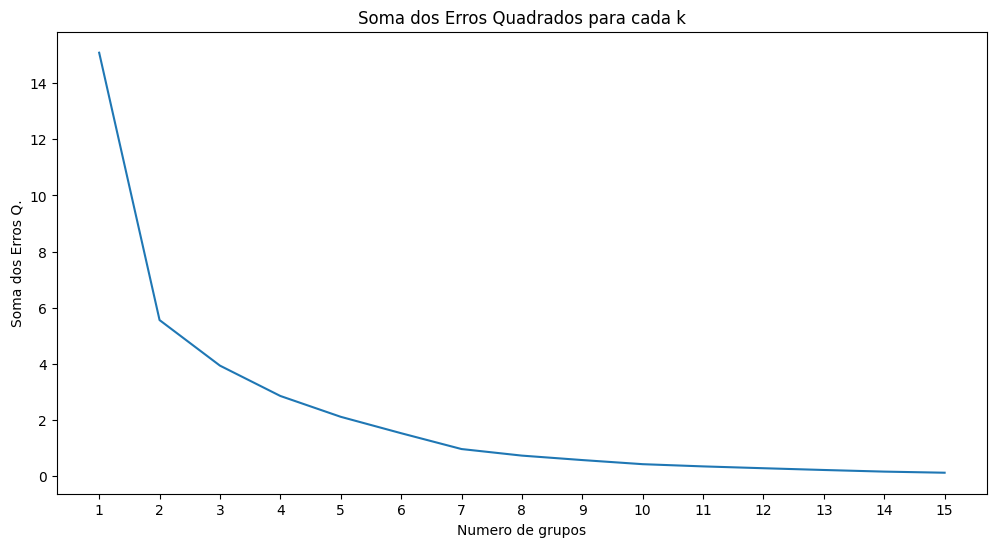

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
}

N_CLUSTERS = range(1, 16)

# sum of squared errors, silhoette
sse, silhouette_coefficients = [], []
for k in N_CLUSTERS:
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(feats_scl)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_coefficients.append(silhouette_score(feats_scl, kmeans.labels_))

pd.Series(sse, index=N_CLUSTERS).plot(figsize=(12,6), 
                                      title='Soma dos Erros Quadrados para cada k',
                                      xlabel='Numero de grupos', ylabel='Soma dos Erros Q.',
                                      xticks=N_CLUSTERS)

<Axes: title={'center': 'Valor da métrica da silhouette'}, xlabel='Numero de grupos', ylabel='Silhouette'>

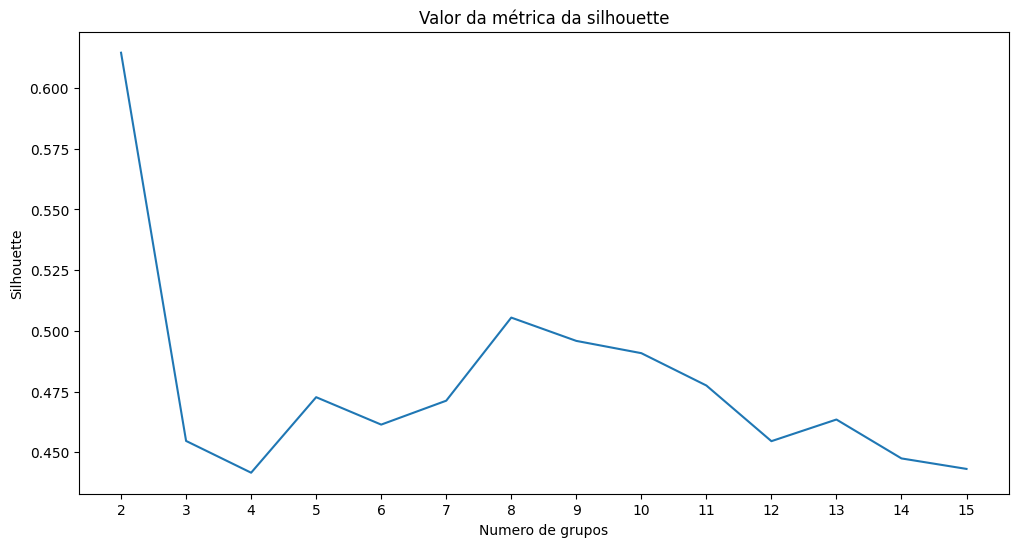

In [19]:
sil_scores = pd.Series(silhouette_coefficients, index=N_CLUSTERS[1:])
sil_scores.plot(figsize=(12,6), 
                title='Valor da métrica da silhouette',
                xlabel='Numero de grupos', ylabel='Silhouette',
                xticks=N_CLUSTERS[1:])

In [20]:
devices_data.head()

,id,first_ts,last_ts,available_duration,plug_name,appliance_category,comment,files_names,power_max
0,343,2021-04-04 21:46:29+00:00,2021-05-03 23:59:59+00:00,29.09,washing_machine,washing,NaN,washing_machine_343.csv,2663.0
1,295,2021-01-16 07:39:05+00:00,2021-02-15 07:39:05+00:00,30.00,internet_router,multimedia,Freebox delta,internet_router_295.csv,38.0
2,254,2021-01-17 06:20:03+00:00,2021-02-16 06:20:03+00:00,30.00,vacuum,other,aspirateur robot Xiaomi 17061 Vacuum Cleaner (V1),vacuum_254.csv,44.0
3,32,2021-01-18 11:13:03+00:00,2021-02-17 11:13:02+00:00,30.00,washing_machine,washing,"lave-linge whirlpool TDLR70230, lave-linge whi...",washing_machine_32.csv,2688.0
4,53,2021-01-18 00:51:25+00:00,2021-02-17 00:51:25+00:00,30.00,dishwasher,washing,NaN,dishwasher_53.csv,1806.0


In [21]:
from sklearn.preprocessing import LabelEncoder

device_names = [f'{x}.csv' for x in feats_scl.index] 

devices_data = devices_data.loc[devices_data['files_names'].isin(device_names)]
category = devices_data['appliance_category']

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(category)

label_encoder.classes_

array(['cooling', 'kitchen', 'multimedia', 'other', 'washing'],
      dtype=object)

In [22]:
pd.Series(category).value_counts()

appliance_category
kitchen       13
multimedia    11
washing        8
other          7
cooling        2
Name: count, dtype: int64

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

model = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=50,
    max_iter=500,
)

feats_pca = pca.fit_transform(feats_scl)
model.fit(feats_pca)

pca_df = pd.DataFrame(
    feats_pca,
    columns=['PC1', 'PC2'],
)

pca_df['Predicted'] = model.labels_
pca_df['Actual'] = category

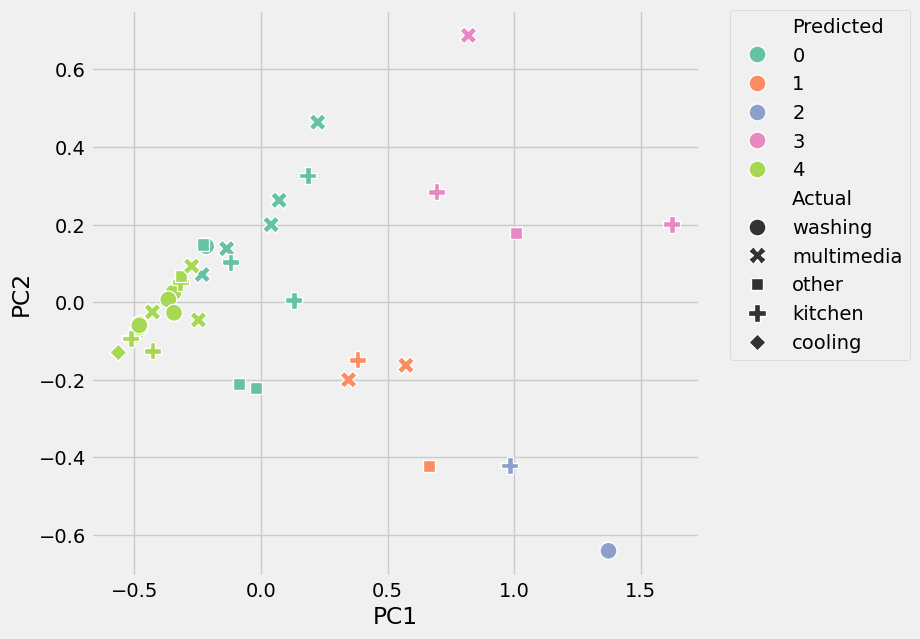

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.figure(figsize=(7, 7))
scat = sns.scatterplot(
    x="PC1",
    y="PC2",
    s=150,
    data=pca_df,
    hue="Predicted",
    style="Actual",
    palette="Set2"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

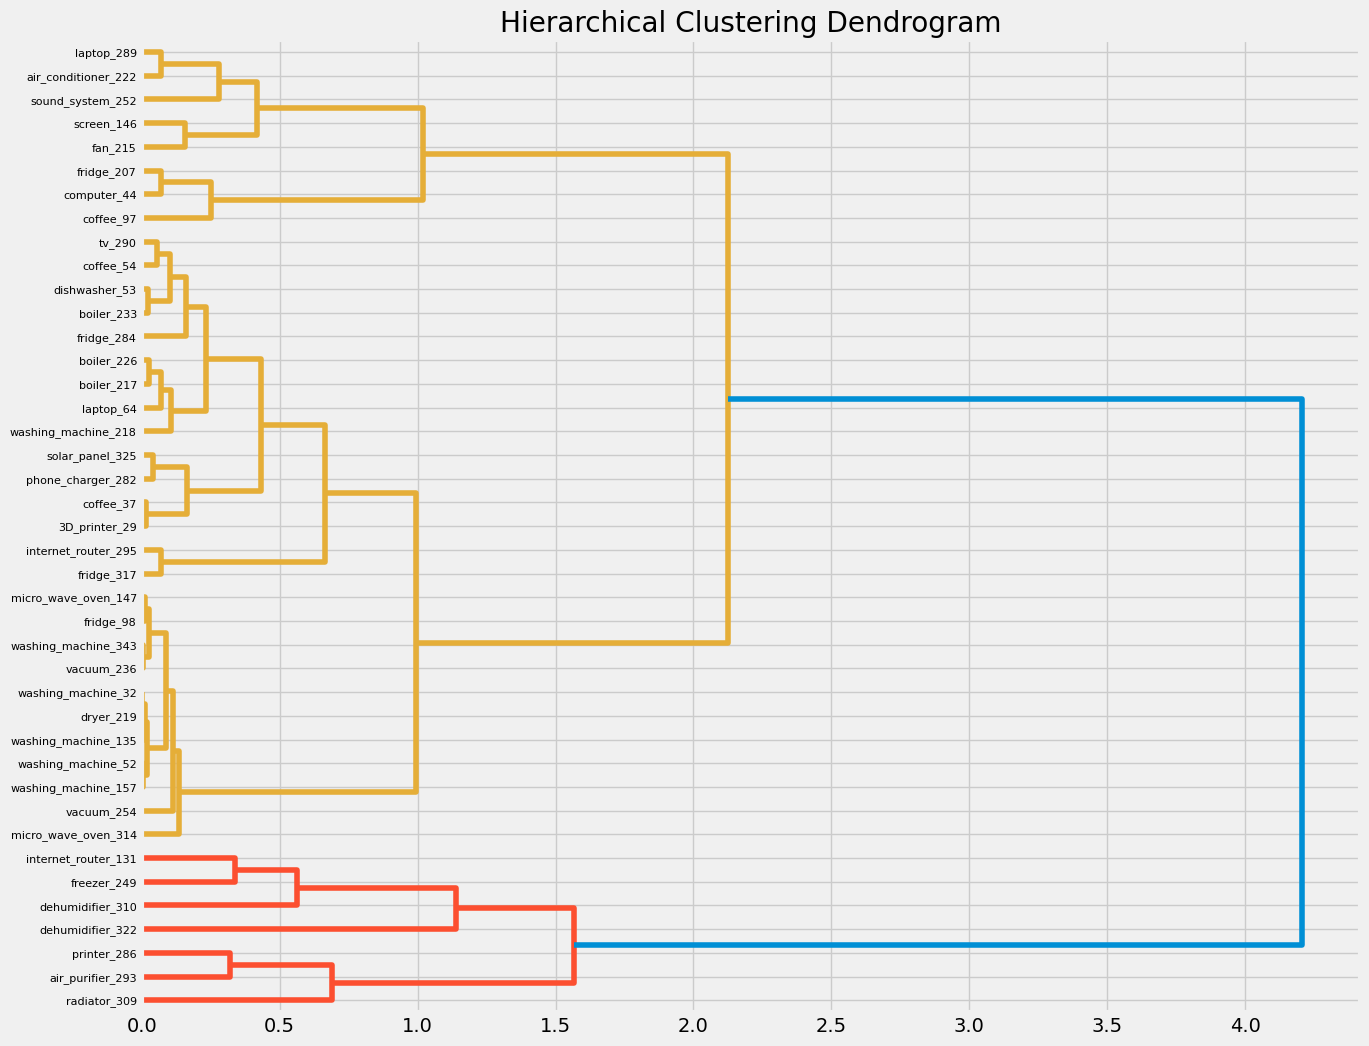

In [25]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plt.title("Hierarchical Clustering Dendrogram")

clusters = hc.linkage(feats_scl, 
            method='ward', 
            metric="euclidean")
hc.dendrogram(Z=clusters, labels=feats_scl.index, orientation='right')
plt.show()

#### Com dados brutos

In [26]:
from tslearn.clustering import TimeSeriesKMeans
?TimeSeriesKMeans

Init signature:
TimeSeriesKMeans(
    n_clusters=3,
    max_iter=50,
    tol=1e-06,
    n_init=1,
    metric='euclidean',
    max_iter_barycenter=100,
    metric_params=None,
    n_jobs=None,
    dtw_inertia=False,
    verbose=0,
    random_state=None,
    init='k-means++',
)
Docstring:     
K-means clustering for time-series data.

Parameters
----------
n_clusters : int (default: 3)
    Number of clusters to form.

max_iter : int (default: 50)
    Maximum number of iterations of the k-means algorithm for a single run.

tol : float (default: 1e-6)
    Inertia variation threshold. If at some point, inertia varies less than
    this threshold between two consecutive
    iterations, the model is considered to have converged and the algorithm
    stops.

n_init : int (default: 1)
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of n_init
    consecutive runs in terms of inertia.

metric : {"euclidean", "dtw", 

In [27]:
# sum of squared errors, silhoette
sse, silhouette_coefficients = [], []
for k in N_CLUSTERS:
    print(k)
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='dtw',max_iter=30)
    kmeans.fit(series_df)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_coefficients.append(silhouette_score(series_df, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


<Axes: title={'center': 'Soma dos Erros Quadrados para cada k'}, xlabel='Numero de grupos', ylabel='Soma dos Erros Q.'>

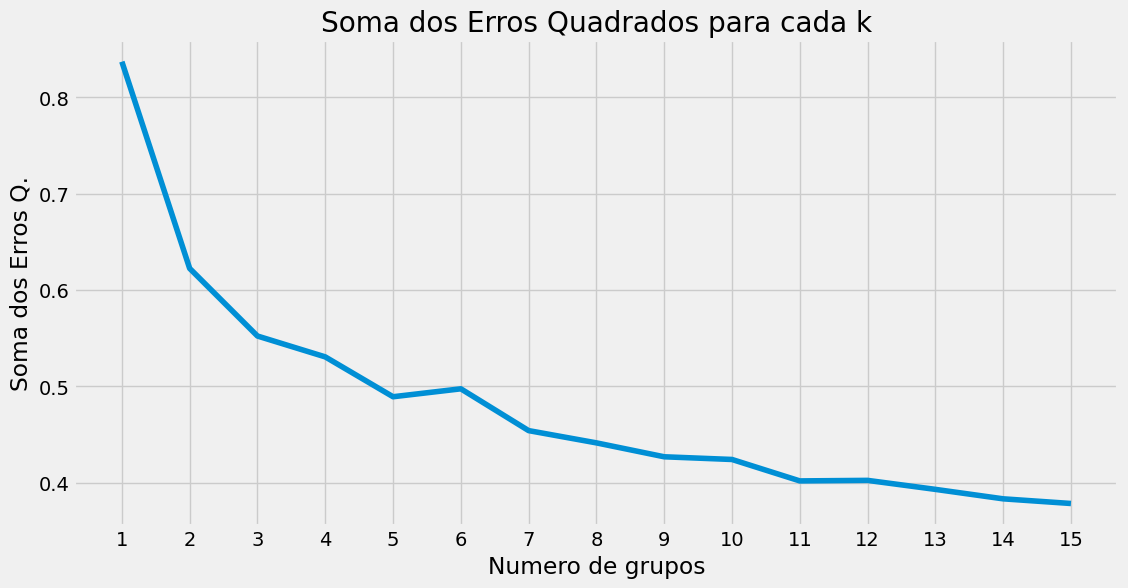

In [28]:
pd.Series(sse, index=N_CLUSTERS).plot(figsize=(12,6), 
                                      title='Soma dos Erros Quadrados para cada k',
                                      xlabel='Numero de grupos', ylabel='Soma dos Erros Q.',
                                      xticks=N_CLUSTERS)

<Axes: title={'center': 'Valor da métrica da silhouette'}, xlabel='Numero de grupos', ylabel='Silhouette'>

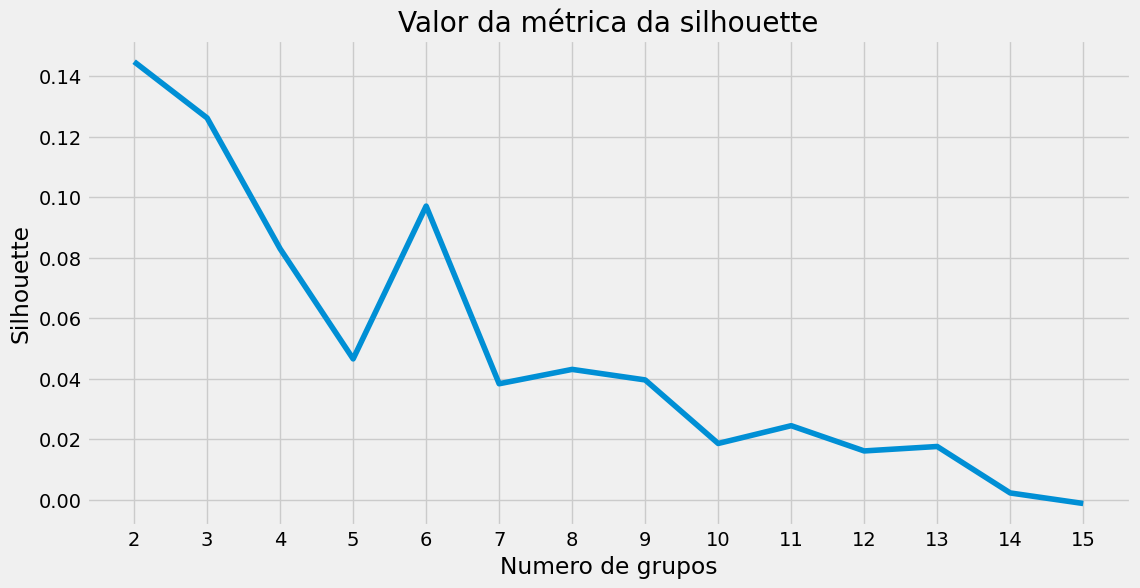

In [29]:
sil_scores = pd.Series(silhouette_coefficients, index=N_CLUSTERS[1:])
sil_scores.plot(figsize=(12,6), 
                title='Valor da métrica da silhouette',
                xlabel='Numero de grupos', ylabel='Silhouette',
                xticks=N_CLUSTERS[1:])

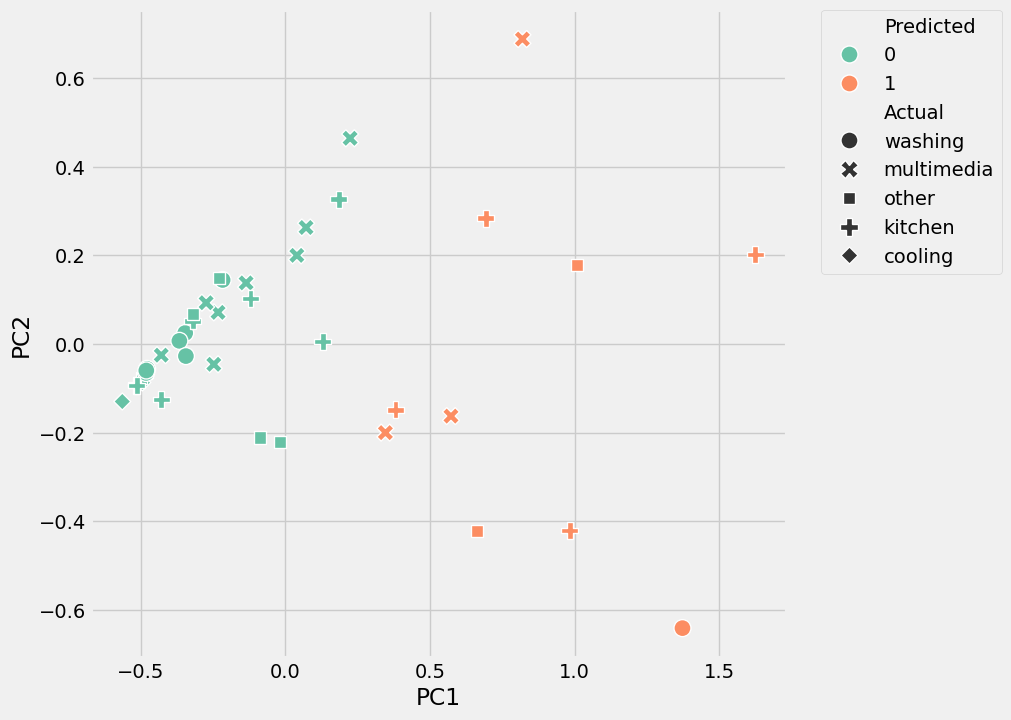

In [30]:
kmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw',max_iter=100)

feats_pca = pca.fit_transform(feats_scl)
kmeans.fit(feats_pca)

pca_df = pd.DataFrame(
    feats_pca,
    columns=['PC1', 'PC2'],
)

pca_df['Predicted'] = kmeans.labels_
pca_df['Actual'] = category

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
    x="PC1",
    y="PC2",
    s=150,
    data=pca_df,
    hue="Predicted",
    style="Actual",
    palette="Set2"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
idx = np.argwhere(feats_pca[:,0] > 1.3).flatten()

In [32]:
feats_scl.iloc[idx,:]

,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum
dehumidifier_322,0.762327,1.000000,0.762327,0.0,1.000000,1.000000,0.923966,4.440892e-16,4.440892e-16,0.0
radiator_309,1.000000,0.902548,1.000000,0.0,0.426177,0.224707,1.000000,3.330669e-16,3.330669e-16,0.0


## 